In [25]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

In [29]:
sns.set_style('darkgrid')

In [17]:
# Problem : Predict google upward or downward trend of stock for 2017 by learning 5 yrs of past data. 

train = pd.read_csv('Google_Stock_Price_Train.csv')

In [20]:
# train set from 2012 Jan to 2016 Dec
train.head(5)  ## Open is the target variable

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [28]:
train.tail(5)  

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


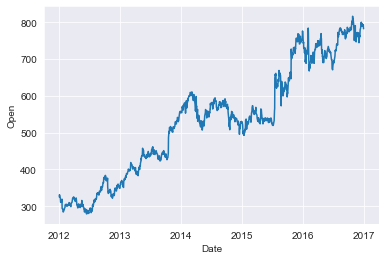

In [30]:
# Visualize the trend of stocks

sns.lineplot(pd.to_datetime(train['Date']),train['Open']) # stocks tend to increase yearly with some downward trend inbetween.

In [31]:
train_set = train.iloc[:,1:2].values  ## contains open feature

In [32]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [33]:
## Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [34]:
train_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [36]:
#Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []
# since this is a time series data, for each next day stock prediction we want the RNN to look at 60 previous observations. 
# We take a 'for' loop from 60, coz we can start predicting only form 60th day. So for this the RNN looks at 0 to 59th stock prices.
# X_train contains previous 60 stocks before i, and y_train contains the 'i'th day stock. 

for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])  
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [37]:
X_train # each list will contain 60 observations. 

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [39]:
y_train #contains 'i'th observations. 

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [40]:
X_train.shape

(1198, 60)

In [45]:
# reshaping as RNN accepts only 3D data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [46]:
X_train.shape ## here the depth is just 1 as we are only using stocks to predict stocks. it can be more if we want to add more columns other than 'open'


(1198, 60, 1)

In [47]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [ ]:
## Done with preprocessing

In [49]:
## LSTM Architecture

In [50]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [51]:
regressor = Sequential()

In [52]:
# LSTM Layout and DropOut
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) ## input shape here is (60,1), return sequences =True as we are using stacked LSTM
regressor.add(Dropout(0.2))

In [53]:
# 2nd LSTM
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [54]:
# 3rd LSTM
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [55]:
# 4th LSTM
regressor.add(LSTM(units = 50))  ## return_seq = False here beciare there are no LSTM after this
regressor.add(Dropout(0.2))

In [56]:
# Output Layer
regressor.add(Dense(units = 1))

In [ ]:
# checking the model

regressor.summary()

In [58]:
# compiling the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [59]:
# Fitting the data
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 42s 187ms/step - loss: 0.1072
Epoch 2/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 8s 198ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0044
Epoch 13/100

In [62]:
# Get actual stocks for Jan.2017 contains 20 days
test = pd.read_csv('Google_Stock_Price_Test.csv')
test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


(array([736334., 736338., 736342., 736346., 736350., 736354., 736358.,
        736361.]),
 <a list of 8 Text major ticklabel objects>)

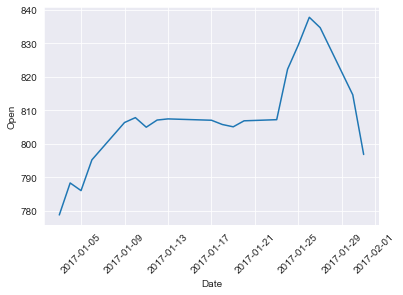

In [65]:
# Visualize the trend of actual stocks

sns.lineplot(pd.to_datetime(test['Date']),test['Open'])
plt.xticks(rotation=45)

In [64]:
# This is what we are trying to predict. We might not get the exact values but can definetly get the trend. 

In [61]:
real_stock_price = test.iloc[:, 1:2].values
real_stock_price  ## actual stock price for 2017

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [98]:
# To predict each day stcok of 2017, we need 60 previous stock prices. For the first finanacial day of Jan 2017 i.e 3rd Jan, we need data of Nov 2016 and Dec 2016.
# To do this we will combine the train and test data here.  
total = pd.concat((train['Open'], test['Open']), axis = 0)

total.head()  # contains data from 2012 to 2017. 2012-2016 : we have , 2017: we wnt to predict

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [99]:
# Next from total, we will take data from Jan3 - 60 days. Coz we have to start predicting from Jan 3. To predict Jan 3, we need only 60 day previous data not the whole total dataset. 
# To get the index of Jan3 we do, len(total) - len(test). From this we will subtract 60 days. This will give us stocks from Jan3 - 60 th day. 
inputs = total[len(total) - len(test) - 60:].values
print(inputs)

[779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33 782.75
 778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86]


In [100]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [101]:
inputs[60-60:60,0]

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75])

In [102]:
# Scaling the inputs. 
inputs = sc.transform(inputs)
# For each day prediction X_test will have 60 previous data. Hence the below for loop to get the same. 
# Note: To predict each day stock in Jan, we will use previous day's actual stocks instead of the predicted stocks. 
X_test = []
for i in range(60, 80): #index 60 coz this index is Jan3rd. 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
# reshaping it to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_stock_price = regressor.predict(X_test)


In [103]:
pred_stock_price

array([[0.959315  ],
       [0.95457375],
       [0.95694804],
       [0.95979464],
       [0.9657303 ],
       [0.976237  ],
       [0.9840991 ],
       [0.98525786],
       [0.98498654],
       [0.985363  ],
       [0.9861822 ],
       [0.9866327 ],
       [0.9869482 ],
       [0.98865956],
       [0.9907611 ],
       [1.0007708 ],
       [1.0134413 ],
       [1.0252639 ],
       [1.0292534 ],
       [1.017756  ]], dtype=float32)

In [104]:
# Do inverse tranform for normal values
pred_stock_price = sc.inverse_transform(pred_stock_price)
pred_stock_price

array([[794.8094 ],
       [792.2606 ],
       [793.537  ],
       [795.0672 ],
       [798.25793],
       [803.90594],
       [808.1323 ],
       [808.7552 ],
       [808.6093 ],
       [808.8117 ],
       [809.2521 ],
       [809.49426],
       [809.6639 ],
       [810.58386],
       [811.71356],
       [817.0943 ],
       [823.9055 ],
       [830.26086],
       [832.4054 ],
       [826.22485]], dtype=float32)

### Visualising the results

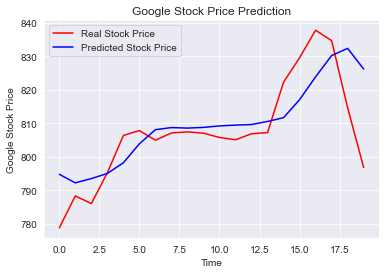

In [105]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(pred_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [106]:
# We can see that the trend is almost similar to that of actual stocks of 2017. 
# We can also see in some places the actual values do not match the predicted values, 
# this is because the model cannot predict the sudden behaviour change in trend of the stocks such as sudden upward raise or downward fall.